In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import timeit
#import shap
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import train_test_split

___

# Read-in and One-Hot Encoding

In [2]:
# Read-in Excel is very slow

# df1 = pd.read_excel("data_new/train.xlsx", sheet_name="positive_peak_time")
# df2 = pd.read_excel("data_new/train.xlsx", sheet_name="negative_peak_time")
# df3 = pd.read_excel("data_new/train.xlsx", sheet_name="arrival_time")
# df4 = pd.read_excel("data_new/train.xlsx", sheet_name="positive_duration")
# df5 = pd.read_excel("data_new/train.xlsx", sheet_name="negative_duration")
# df6 = pd.read_excel("data_new/train.xlsx", sheet_name="positive_pressure")
# df7 = pd.read_excel("data_new/train.xlsx", sheet_name="negative_pressure")
# df8 = pd.read_excel("data_new/train.xlsx", sheet_name="positive_impulse")



# dt1 = pd.read_excel("data_new/test.xlsx", sheet_name="positive_peak_time")
# dt2 = pd.read_excel("data_new/test.xlsx", sheet_name="negative_peak_time")
# dt3 = pd.read_excel("data_new/test.xlsx", sheet_name="arrival_time")
# dt4 = pd.read_excel("data_new/test.xlsx", sheet_name="positive_duration")
# dt5 = pd.read_excel("data_new/test.xlsx", sheet_name="negative_duration")
# dt6 = pd.read_excel("data_new/test.xlsx", sheet_name="positive_pressure")
# dt7 = pd.read_excel("data_new/test.xlsx", sheet_name="negative_pressure")
# dt8 = pd.read_excel("data_new/test.xlsx", sheet_name="positive_impulse")

In [3]:
df1 = pd.read_csv('data_new/train/positive_peak_time.csv')
df2 = pd.read_csv('data_new/train/negative_peak_time.csv')
df3 = pd.read_csv('data_new/train/arrival_time.csv')
df4 = pd.read_csv('data_new/train/positive_duration.csv')
df5 = pd.read_csv('data_new/train/negative_duration.csv')
df6 = pd.read_csv('data_new/train/positive_pressure.csv')
df7 = pd.read_csv('data_new/train/negative_pressure.csv')
df8 = pd.read_csv('data_new/train/positive_impulse.csv')

dt1 = pd.read_csv('data_new/test/positive_peak_time_test.csv')
dt2 = pd.read_csv('data_new/test/negative_peak_time_test.csv')
dt3 = pd.read_csv('data_new/test/arrival_time_test.csv')
dt4 = pd.read_csv('data_new/test/positive_duration_test.csv')
dt5 = pd.read_csv('data_new/test/negative_duration_test.csv')
dt6 = pd.read_csv('data_new/test/positive_pressure_test.csv')
dt7 = pd.read_csv('data_new/test/negative_pressure_test.csv')
dt8 = pd.read_csv('data_new/test/positive_impulse_test.csv')

In [4]:
# # Approx 7 min to run !!

# dk1 = pd.read_excel("data_new/large_validate.xlsx", sheet_name="positive_peak_time")
# dk2 = pd.read_excel("data_new/large_validate.xlsx", sheet_name="negative_peak_time")
# dk3 = pd.read_excel("data_new/large_validate.xlsx", sheet_name="arrival_time")
# dk4 = pd.read_excel("data_new/large_validate.xlsx", sheet_name="positive_duration")
# dk5 = pd.read_excel("data_new/large_validate.xlsx", sheet_name="negative_duration")
# dk6 = pd.read_excel("data_new/large_validate.xlsx", sheet_name="positive_pressure")
# dk7 = pd.read_excel("data_new/large_validate.xlsx", sheet_name="negative_pressure")
# dk8 = pd.read_excel("data_new/large_validate.xlsx", sheet_name="positive_impulse")

# dk1

In [5]:
# dt1.to_csv('data_new/test/positive_peak_time_test.csv', index=False)
# dt2.to_csv('data_new/test/negative_peak_time_test.csv', index=False)
# dt3.to_csv('data_new/test/arrival_time_test.csv', index=False)
# dt4.to_csv('data_new/test/positive_duration_test.csv', index=False)
# dt5.to_csv('data_new/test/negative_duration_test.csv', index=False)
# dt6.to_csv('data_new/test/positive_pressure_test.csv', index=False)
# dt7.to_csv('data_new/test/negative_pressure_test.csv', index=False)
# dt8.to_csv('data_new/test/positive_impulse_test.csv', index=False)


# df1.to_csv('data_new/train/positive_peak_time.csv', index=False)
# df2.to_csv('data_new/train/negative_peak_time.csv', index=False)
# df3.to_csv('data_new/train/arrival_time.csv', index=False)
# df4.to_csv('data_new/train/positive_duration.csv', index=False)
# df5.to_csv('data_new/train/negative_duration.csv', index=False)
# df6.to_csv('data_new/train/positive_pressure.csv', index=False)
# df7.to_csv('data_new/train/negative_pressure.csv', index=False)
# df8.to_csv('data_new/train/positive_impulse.csv', index=False)

In [6]:
# dk1.to_csv('data_new/large/positive_peak_time_valid.csv', index=False)
# dk2.to_csv('data_new/large/negative_peak_time_valid.csv', index=False)
# dk3.to_csv('data_new/large/arrival_time_valid.csv', index=False)
# dk4.to_csv('data_new/large/positive_duration_valid.csv', index=False)
# dk5.to_csv('data_new/large/negative_duration_valid.csv', index=False)
# dk6.to_csv('data_new/large/positive_pressure_valid.csv', index=False)
# dk7.to_csv('data_new/large/negative_pressure_valid.csv', index=False)
# dk8.to_csv('data_new/large/positive_impulse_valid.csv', index=False)

In [7]:
# Much Faster !! Only 5s

# dv1 = pd.read_csv('data_new/large/positive_peak_time_valid.csv')
# dv2 = pd.read_csv('data_new/large/negative_peak_time_valid.csv')
# dv3 = pd.read_csv('data_new/large/arrival_time_valid.csv')
# dv4 = pd.read_csv('data_new/large/positive_duration_valid.csv')
# dv5 = pd.read_csv('data_new/large/negative_duration_valid.csv')
# dv6 = pd.read_csv('data_new/large/positive_pressure_valid.csv')
# dv7 = pd.read_csv('data_new/large/negative_pressure_valid.csv')
# dv8 = pd.read_csv('data_new/large/positive_impulse_valid.csv')

In [8]:
df1

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance,Target
0,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,Superheated,5,0.012166
1,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,Superheated,6,0.014556
2,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,Superheated,7,0.017034
3,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,Superheated,8,0.019576
4,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,Superheated,9,0.022172
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,Subcooled,36,0.093782
21596,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,Subcooled,37,0.096635
21597,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,Subcooled,38,0.099487
21598,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,Subcooled,39,0.102341


In [9]:
# Filter rows where ID starts with 'B'
Butane_df = df7[df7['ID'].str.startswith('B')]
Propane_df = df7[df7['ID'].str.startswith('P')]
Butane_df

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance,Target
0,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,Superheated,5,-0.235991
1,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,Superheated,6,-0.201731
2,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,Superheated,7,-0.178508
3,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,Superheated,8,-0.155312
4,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,Superheated,9,-0.140151
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,Subcooled,36,-0.043038
21596,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,Subcooled,37,-0.045629
21597,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,Subcooled,38,-0.046404
21598,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,Subcooled,39,-0.046004


In [10]:
features = 'Target'

print(Butane_df[features].min())
print(Butane_df[features].max())

print()

print(Propane_df[features].min())
print(Propane_df[features].max())

-0.98783916
-0.0044718068

-0.70723188
-0.007548995


In [11]:
dt1.columns

Index(['ID', 'Tank Failure Pressure (bar)', 'Liquid Ratio (%)',
       'Tank Width (m)', 'Tank Length (m)', 'Tank Height (m)',
       'Height of BLEVE (m)', 'Tank Height with Gas (m)',
       ' Vapour Temerature (K)', ' Liquid Temerature (K)', 'Status',
       'Stand-off Distance', 'Target'],
      dtype='object')

In [12]:
# Label encoding 'Status' feature into 0 and 1 
# 0 for Subcooled and 1 for Superheated

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

df5['Status'] = LE.fit_transform(df5['Status'])
dt5['Status'] = LE.fit_transform(dt5['Status'])

df5

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance,Target
0,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,5,0.009827
1,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,6,0.009906
2,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,7,0.009970
3,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,8,0.010039
4,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,9,0.010011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,36,0.017944
21596,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,37,0.017724
21597,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,38,0.017498
21598,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,39,0.017280


In [13]:
dt5.iloc[30:50,:]

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance,Target
30,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,35,0.015426
31,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,36,0.015341
32,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,37,0.015277
33,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,38,0.015224
34,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,39,0.015191
35,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,40,0.015170
36,P168,12.72223,0.648320,1.8,8.2,0.6,1.8,0.2,389.7,296.4,0,5,0.009043
37,P168,12.72223,0.648320,1.8,8.2,0.6,1.8,0.2,389.7,296.4,0,6,0.009390
38,P168,12.72223,0.648320,1.8,8.2,0.6,1.8,0.2,389.7,296.4,0,7,0.009452
39,P168,12.72223,0.648320,1.8,8.2,0.6,1.8,0.2,389.7,296.4,0,8,0.009528


In [14]:
X_traindf = df5.drop(['ID','Target'], axis=1)
X_testdf = dt5.drop(['ID','Target'], axis=1)

X_traindf

,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance
0,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,5
1,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,6
2,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,7
3,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,8
4,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,9
...,...,...,...,...,...,...,...,...,...,...,...
21595,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,36
21596,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,37
21597,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,38
21598,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,39


In [15]:
X_testdf

,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance
0,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,5
1,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,6
2,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,7
3,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,8
4,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,9
...,...,...,...,...,...,...,...,...,...,...,...
7195,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,1,36
7196,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,1,37
7197,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,1,38
7198,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,1,39


In [16]:
y5_train = df5['Target']
y5_train

0        0.009827
1        0.009906
2        0.009970
3        0.010039
4        0.010011
           ...   
21595    0.017944
21596    0.017724
21597    0.017498
21598    0.017280
21599    0.017078
Name: Target, Length: 21600, dtype: float64

In [17]:
y1_train = df1['Target']
y2_train = df2['Target']
y3_train = df3['Target']
y4_train = df4['Target']
y6_train = df6['Target']
y7_train = df7['Target']
y8_train = df8['Target']

In [18]:
y1_test = dt1['Target']
y2_test = dt2['Target']
y3_test = dt3['Target']
y4_test = dt4['Target']
y5_test = dt5['Target']
y6_test = dt6['Target']
y7_test = dt7['Target']
y8_test = dt8['Target']

y1_test

0       0.012114
1       0.014798
2       0.017533
3       0.020293
4       0.023077
          ...   
7195    0.091819
7196    0.094618
7197    0.097421
7198    0.100227
7199    0.103035
Name: Target, Length: 7200, dtype: float64

___

# Standardization and Power Transform

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

In [31]:
# Processing both X_train and X_test using standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_traindf)
X_test = scaler.transform(X_testdf)
X_train.shape

(21600, 11)

array([[<AxesSubplot:title={'center':'Tank Failure Pressure (bar)'}>,
        <AxesSubplot:title={'center':'Liquid Ratio (%)'}>,
        <AxesSubplot:title={'center':'Tank Width (m)'}>],
       [<AxesSubplot:title={'center':'Tank Length (m)'}>,
        <AxesSubplot:title={'center':'Tank Height (m)'}>,
        <AxesSubplot:title={'center':'Height of BLEVE (m)'}>],
       [<AxesSubplot:title={'center':'Tank Height with Gas (m)'}>,
        <AxesSubplot:title={'center':'Vapour Temperature (K)'}>,
        <AxesSubplot:title={'center':'Liquid Temperature (K)'}>],
       [<AxesSubplot:title={'center':'Status'}>,
        <AxesSubplot:title={'center':'Stand-off Distance (m)'}>,
        <AxesSubplot:>]], dtype=object)

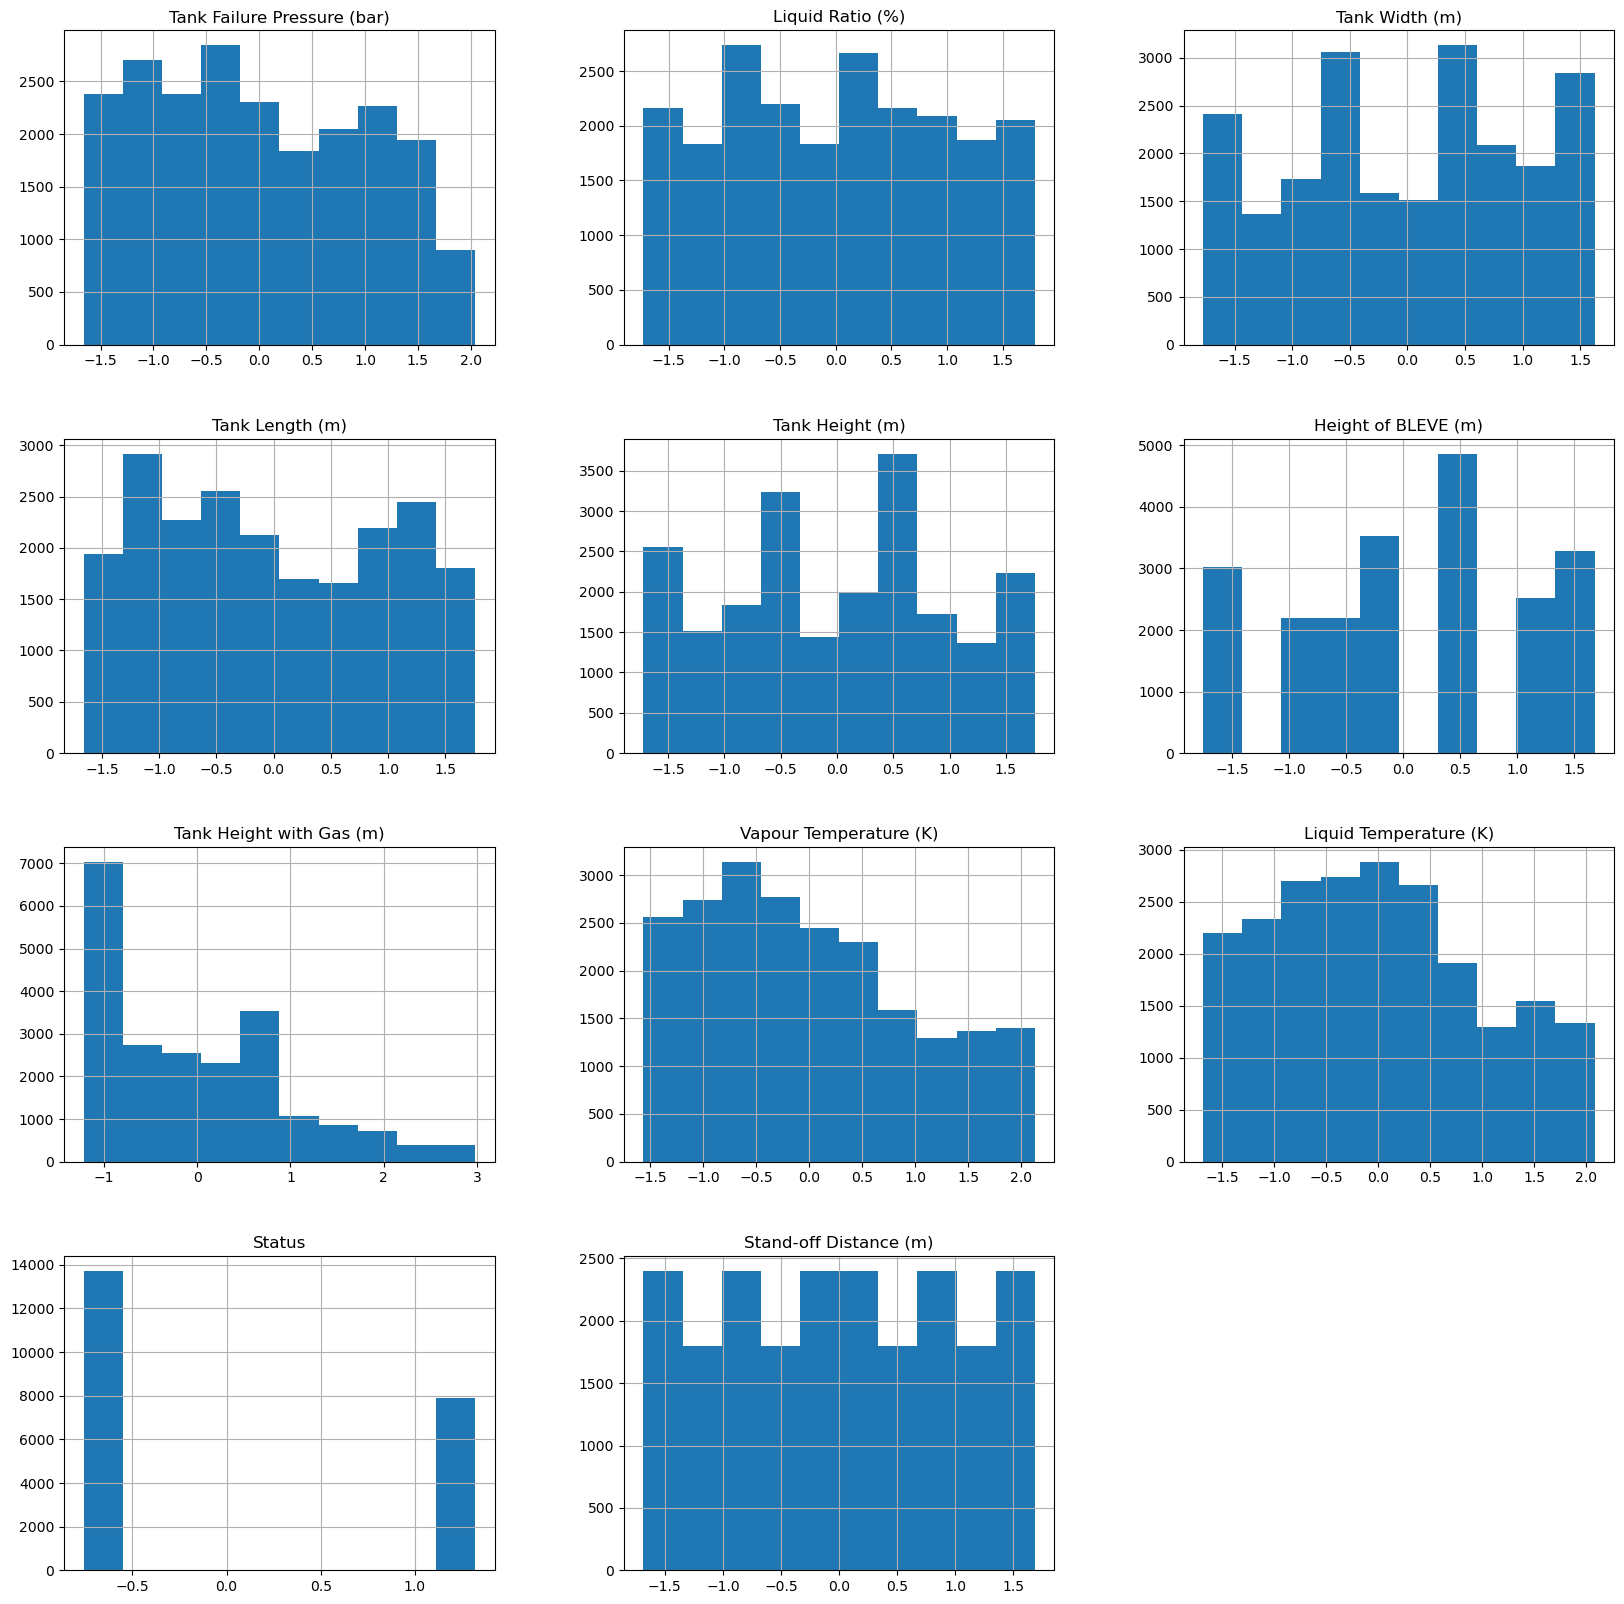

In [35]:
# Double check if it succeeded
df_stdscal = pd.DataFrame(X_train)
df_stdscal.columns = ['Tank Failure Pressure (bar)', 'Liquid Ratio (%)', 'Tank Width (m)', 'Tank Length (m)', 
                      'Tank Height (m)', 'Height of BLEVE (m)', 'Tank Height with Gas (m)', 'Vapour Temperature (K)', 
                      'Liquid Temperature (K)', 'Status', 'Stand-off Distance (m)']
df_stdscal.hist(figsize = (20,20), bins=10)

In [73]:
# Sci-Kit Learn and PyTorch in libmtl is of different verison ==> slightly different results

quantile1 = QuantileTransformer(output_distribution='normal', random_state=42)
quantile2 = QuantileTransformer(output_distribution='normal', random_state=42)
quantile3 = QuantileTransformer(output_distribution='normal', random_state=42)
quantile4 = QuantileTransformer(output_distribution='normal', random_state=42)
quantile5 = QuantileTransformer(output_distribution='normal', random_state=42)
quantile6 = QuantileTransformer(output_distribution='normal', random_state=42)
quantile7 = QuantileTransformer(output_distribution='normal', random_state=42)
quantile8 = QuantileTransformer(output_distribution='normal', random_state=42)


y1_train_normal = quantile1.fit_transform(y1_train.values.reshape(-1,1))
y1_test_normal = quantile1.transform(y1_test.values.reshape(-1,1))


y2_train_normal = quantile2.fit_transform(y2_train.values.reshape(-1,1))
y2_test_normal = quantile2.transform(y2_test.values.reshape(-1,1))

y3_train_normal = quantile3.fit_transform(y3_train.values.reshape(-1,1))
y3_test_normal = quantile3.transform(y3_test.values.reshape(-1,1))

y4_train_normal = quantile4.fit_transform(y4_train.values.reshape(-1,1))
y4_test_normal = quantile4.transform(y4_test.values.reshape(-1,1))

y5_train_normal = quantile5.fit_transform(y5_train.values.reshape(-1,1))
y5_test_normal = quantile5.transform(y5_test.values.reshape(-1,1))

y6_train_normal = quantile6.fit_transform(y6_train.values.reshape(-1,1))
y6_test_normal = quantile6.transform(y6_test.values.reshape(-1,1))

y7_train_normal = quantile7.fit_transform(y7_train.values.reshape(-1,1))
y7_test_normal = quantile7.transform(y7_test.values.reshape(-1,1))

y8_train_normal = quantile8.fit_transform(y8_train.values.reshape(-1,1))
y8_test_normal = quantile8.transform(y8_test.values.reshape(-1,1))

/tmp/ipykernel_309/531650105.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y1_train, bins=50, color='b', ax=ax)
/tmp/ipykernel_309/531650105.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y1_train_normal, bins=50, color='b', ax=ax)


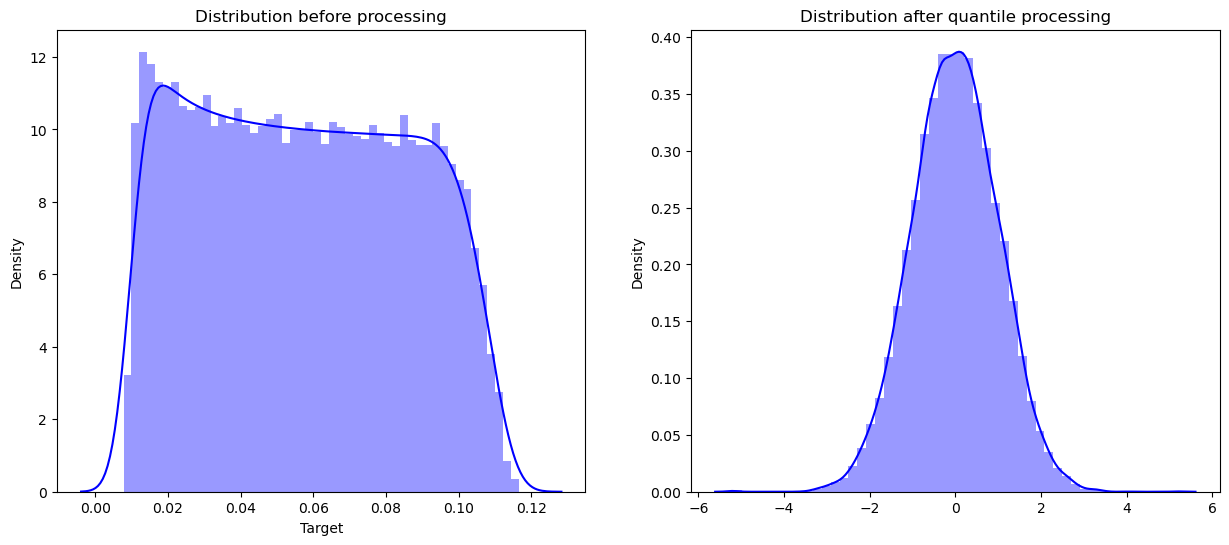

In [76]:
# Visualize the effect of power transformation
f = plt.figure(figsize=(15, 6))

ax = f.add_subplot(121)
sns.distplot(y1_train, bins=50, color='b', ax=ax)
ax.set_title('Distribution before processing')

ax=f.add_subplot(122)
sns.distplot(y1_train_normal, bins=50, color='b', ax=ax)
ax.set_title('Distribution after quantile processing')
print()

# ax = f.add_subplot(323)
# sns.distplot(y2_train, bins=50, color='r', ax=ax)
# ax.set_title('Distribution before processing')

# ax=f.add_subplot(324)
# sns.distplot(y2_train_normal, bins=50, color='b', ax=ax)
# ax.set_title('Distribution after quantile processing')
# print()

# ax = f.add_subplot(325)
# sns.distplot(y2_test, bins=50, color='r', ax=ax)
# ax.set_title('Distribution before processing')

# ax=f.add_subplot(326)
# sns.distplot(y2_test_normal, bins=50, color='b', ax=ax)
# ax.set_title('Distribution after quantile processing')
# print()

# plt.tight_layout()

In [17]:
y1_test_check = quantile1.inverse_transform(y1_test_normal)
y1_test_check

array([[0.01211439],
       [0.01479826],
       [0.01753254],
       ...,
       [0.09742103],
       [0.1002275 ],
       [0.10303451]])

In [18]:
y1_test

0       0.012114
1       0.014798
2       0.017533
3       0.020293
4       0.023077
          ...   
7195    0.091819
7196    0.094618
7197    0.097421
7198    0.100227
7199    0.103035
Name: Target, Length: 7200, dtype: float64

In [19]:
y1_test_normal

array([[-1.90100079],
       [-1.55437385],
       [-1.32592489],
       ...,
       [ 1.29240572],
       [ 1.44632316],
       [ 1.62882537]])

In [20]:
y1_train_normal

array([[-1.8941433 ],
       [-1.57538869],
       [-1.36364336],
       ...,
       [ 1.40730921],
       [ 1.58586753],
       [ 1.81972382]])

___

# ANN

In [21]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset, TensorDataset

from LibMTL.config import LibMTL_args, prepare_args
# import LibMTL.weighting as weighting_method
from LibMTL.architecture import *
from LibMTL.metrics import AbsMetric
from LibMTL.loss import AbsLoss
from LibMTL.weighting import *

from LibMTL import Trainer


torch.backends.cudnn.version() , torch.backends.cudnn.enabled
torch.manual_seed(0)

In [22]:
a = torch.tensor([0,1,2,3,4,5])
b = torch.tensor([5,4,3,2,1,0])

print(torch.abs(a-b/a))

c = torch.square(a)


# a.size()[0]
print(c[1])
print(c[1].item())

tensor([   inf, 3.0000, 0.5000, 2.3333, 3.7500, 5.0000])
tensor(1)
1


In [23]:
# convert data to torch.FloatTensor
X_train_torch = torch.from_numpy(X_train.astype(np.float32))
X_test_torch = torch.from_numpy(X_test.astype(np.float32))



y1_train_torch = torch.from_numpy(y1_train_normal.astype(np.float32))
y1_test_torch = torch.from_numpy(y1_test_normal.astype(np.float32))

y2_train_torch = torch.from_numpy(y2_train_normal.astype(np.float32))
y2_test_torch = torch.from_numpy(y2_test_normal.astype(np.float32))

y3_train_torch = torch.from_numpy(y3_train_normal.astype(np.float32))
y3_test_torch = torch.from_numpy(y3_test_normal.astype(np.float32))

y4_train_torch = torch.from_numpy(y4_train_normal.astype(np.float32))
y4_test_torch = torch.from_numpy(y4_test_normal.astype(np.float32))

y5_train_torch = torch.from_numpy(y5_train_normal.astype(np.float32))
y5_test_torch = torch.from_numpy(y5_test_normal.astype(np.float32))

y6_train_torch = torch.from_numpy(y6_train_normal.astype(np.float32))
y6_test_torch = torch.from_numpy(y6_test_normal.astype(np.float32))

y7_train_torch = torch.from_numpy(y7_train_normal.astype(np.float32))
y7_test_torch = torch.from_numpy(y7_test_normal.astype(np.float32))

y8_train_torch = torch.from_numpy(y8_train_normal.astype(np.float32))
y8_test_torch = torch.from_numpy(y8_test_normal.astype(np.float32))

print(X_train_torch)
print(X_train_torch.shape)

tensor([[-0.8024,  0.7595, -0.9898,  ...,  0.6962,  1.3190, -1.6846],
        [-0.8024,  0.7595, -0.9898,  ...,  0.6962,  1.3190, -1.5883],
        [-0.8024,  0.7595, -0.9898,  ...,  0.6962,  1.3190, -1.4921],
        ...,
        [ 0.9096, -1.3719, -1.5129,  ...,  1.5587, -0.7582,  1.4921],
        [ 0.9096, -1.3719, -1.5129,  ...,  1.5587, -0.7582,  1.5883],
        [ 0.9096, -1.3719, -1.5129,  ...,  1.5587, -0.7582,  1.6846]])
torch.Size([21600, 11])


In [24]:
y1_train_torch

tensor([[-1.8941],
        [-1.5754],
        [-1.3636],
        ...,
        [ 1.4073],
        [ 1.5859],
        [ 1.8197]])

In [25]:
y1_test_torch

tensor([[-1.9010],
        [-1.5544],
        [-1.3259],
        ...,
        [ 1.2924],
        [ 1.4463],
        [ 1.6288]])

In [26]:
check = False
n_size = 7200 if check == False else 720000
n_size

7200

In [27]:
# train_data = []
# for i in range(len(X_train_torch)):
#    train_data.append([X_train_torch[i],
#                       y1_train_torch[i], 
#                       y2_train_torch[i],
#                       y3_train_torch[i],
#                       y4_train_torch[i],
#                       y5_train_torch[i],
#                       y6_train_torch[i],
#                       y7_train_torch[i],
#                       y8_train_torch[i]])    # 2D List with 21600 points

# test_data = []
# for i in range(len(X_test_torch)):
#    test_data.append([X_test_torch[i], 
#                      y1_test_torch[i],
#                      y2_test_torch[i],
#                      y3_test_torch[i],
#                      y4_test_torch[i],
#                      y5_test_torch[i],
#                      y6_test_torch[i],
#                      y7_test_torch[i],
#                      y8_test_torch[i]])


target_train = torch.cat((y1_train_torch, y2_train_torch, 
                          y3_train_torch, y4_train_torch,
                          y5_train_torch, y6_train_torch,
                          y7_train_torch, y8_train_torch),dim=1)


target_test = torch.cat((y1_test_torch, y2_test_torch, 
                         y3_test_torch, y4_test_torch,
                         y5_test_torch, y6_test_torch,
                         y7_test_torch, y8_test_torch),dim=1)

   
class BLEVEDataset(Dataset):

    def __init__(self, data, target, sev_tar = False):
        self.data = data
        self.targets = target
        # self.target1 = target[:,0]
        # self.target2 = target[:,1]
        # ...
        self.sevTar = sev_tar

            
    def __len__(self):
        return len(self.data)  
    

    def get_batch_targets(self, idx):
        r"""Fetch a batch of 8 targets
        """
        return [self.targets[:,i][idx] for i in range(8)]   # A list of 8 targets, can use [:idx] to have more samples in a batch
                                                            # More elegant than returning 8 targets
                                                            # self.targets.shape = (21600,8) -- see examples below
        # return self.target1[idx], self.target2[idx], ....
    

    def get_batch_input(self, idx):
        r"""Fetch a batch of inputs
        """
        return self.data[idx]
    
    
    def __getitem__(self, idx):
        inputs = self.get_batch_input(idx)              # targets[0].reshape(1) or not does not matter
        targets = self.get_batch_targets(idx)
        if not self.sevTar:
            targets_dict = {'posi_peaktime': targets[0], 
                            'nega_peaktime': targets[1], 
                            'arri_time': targets[2], 
                            'posi_dur': targets[3], 
                            'nega_dur': targets[4], 
                            'posi_pressure': targets[5], 
                            'nega_pressure': targets[6], 
                            'posi_impulse': targets[7]}
        else:
            targets_dict = {'posi_peaktime': targets[0], 
                            'nega_peaktime': targets[1], 
                            'arri_time': targets[2], 
                            'posi_dur': targets[3], 
                            'nega_dur': targets[4], 
                            'posi_pressure': targets[5], 
                            'nega_pressure': targets[6]}
        
        return inputs, targets_dict
    



class BLEVEDatasetSingle(Dataset):

    def __init__(self, data, target, name):
        self.data = data
        self.targets = target
        self.name = name
      

            
    def __len__(self):
        return len(self.data)  
    

    def get_batch_targets(self, idx):
        r"""Fetch a batch of 1 target
        """
        return self.targets[idx]
    

    def get_batch_input(self, idx):
        r"""Fetch a batch of inputs
        """
        return self.data[idx]
    
    
    def __getitem__(self, idx):
        inputs = self.get_batch_input(idx)
        targets = self.get_batch_targets(idx)
        targets_dict = {self.name: targets}
        
        return inputs, targets_dict
              

In [48]:
len(df1) == len(df2)

True

In [34]:
data_train = BLEVEDatasetSingle(X_train_torch, y1_train_torch.reshape(len(df1)), 'posi_peaktime')
data_test = BLEVEDatasetSingle(X_test_torch, y1_test_torch.reshape(len(dt1)), 'posi_peaktime')


train_loader = DataLoader(data_train, batch_size=512, shuffle=True)  
test_loader = DataLoader(data_test, batch_size=7201, shuffle=False) # PyTorch Dataloader knows how to concatenate to load labels in parallel, 
                                                                   # even as a dict, as long as our batch have indexing


data_test.__getitem__(0)  # 1st data point

data_test.get_batch_targets(0)

tensor(-1.9010)

In [73]:
dataiter = iter(test_loader)
dataiter.next()

for x,y in test_loader:
    print(y)
    break

{'posi_peaktime': tensor([-1.9010, -1.5544, -1.3259,  ...,  1.2924,  1.4463,  1.6288])}


In [75]:
data_train = BLEVEDataset(X_train_torch, target_train, sev_tar=False)
data_test = BLEVEDataset(X_test_torch, target_test, sev_tar=False)


train_loader = DataLoader(data_train, batch_size=512, shuffle=True)  
test_loader = DataLoader(data_test, batch_size=10, shuffle=False) # PyTorch Dataloader knows how to concatenate to load labels in parallel, 
                                                                   # even as a dict, as long as our batch have indexing


data_test.__getitem__(0)  # 1st data point



(tensor([-1.0068,  0.4850,  1.6253, -1.5168,  0.6871, -1.4096,  0.1818, -1.3971,
         -0.4751,  1.3190, -1.6846]),
 {'posi_peaktime': tensor(-1.9010),
  'nega_peaktime': tensor(-1.8902),
  'arri_time': tensor(-2.0552),
  'posi_dur': tensor(-1.2682),
  'nega_dur': tensor(0.1282),
  'posi_pressure': tensor(0.6449),
  'nega_pressure': tensor(-0.4826),
  'posi_impulse': tensor(-0.0019)})

In [31]:
# targets = [target_test[:,i][:10] for i in range(8)]
# targets

print(target_test[:4])
target_test.shape

tensor([[-1.9010e+00, -1.8902e+00, -2.0552e+00, -1.2682e+00,  1.2815e-01,
          6.4485e-01, -4.8260e-01, -1.8789e-03],
        [-1.5544e+00, -1.5801e+00, -1.6186e+00, -9.3773e-01,  6.9809e-02,
          4.3065e-01, -3.5686e-01, -1.3216e-01],
        [-1.3259e+00, -1.3677e+00, -1.3814e+00, -7.1040e-01,  3.5435e-02,
          2.3532e-01, -2.3388e-01, -2.4027e-01],
        [-1.1595e+00, -1.1945e+00, -1.1987e+00, -5.4431e-01, -1.9710e-03,
          5.9703e-02, -8.6944e-02, -3.3711e-01]])


torch.Size([7200, 8])

In [32]:
target_test[:,6]

tensor([-0.4826, -0.3569, -0.2339,  ...,  0.5803,  0.6241,  0.6802])

In [33]:
dataiter = iter(test_loader)
dataiter.next()

for x,y in test_loader:
    print(y)
    break

{'posi_peaktime': tensor([-1.9010, -1.5544, -1.3259, -1.1595, -1.0218, -0.9019, -0.7939, -0.6937,
        -0.6109, -0.5223]), 'nega_peaktime': tensor([-1.8902, -1.5801, -1.3677, -1.1945, -1.0542, -0.9310, -0.8253, -0.7363,
        -0.6531, -0.5654]), 'arri_time': tensor([-2.0552, -1.6186, -1.3814, -1.1987, -1.0630, -0.9347, -0.8234, -0.7217,
        -0.6354, -0.5486]), 'posi_dur': tensor([-1.2682, -0.9377, -0.7104, -0.5443, -0.4664, -0.3760, -0.3269, -0.2937,
        -0.2312, -0.1657]), 'nega_dur': tensor([ 0.1282,  0.0698,  0.0354, -0.0020,  0.0025, -0.0688, -0.0847, -0.0775,
        -0.0757, -0.0846]), 'posi_pressure': tensor([ 0.6449,  0.4306,  0.2353,  0.0597, -0.0935, -0.2243, -0.3538, -0.4645,
        -0.5645, -0.6620]), 'nega_pressure': tensor([-0.4826, -0.3569, -0.2339, -0.0869,  0.1046,  0.2154,  0.2154,  0.2872,
         0.4297,  0.5681]), 'posi_impulse': tensor([-0.0019, -0.1322, -0.2403, -0.3371, -0.4186, -0.4953, -0.5657, -0.6333,
        -0.6975, -0.7524])}


In [34]:
class HuberLoss(AbsLoss):
    """The Huber Error loss function.
    """
    def __init__(self):
        super(HuberLoss, self).__init__()
        
        self.loss_fn = nn.HuberLoss()

    def compute_loss(self, pred, gt):
        loss = self.loss_fn(pred, gt)
        return loss
    

    
    
    """AbsMetric is an abstract class for the performance metrics of a task. 
    Attributes:
        record (list): A list of the metric scores in every iteration.
        bs (list): A list of the number of data in every iteration.
    """


    
  
class MAPE(AbsMetric):
    """Calculate the Mean Absolute Percentage Error (MAPE).
    """
    def __init__(self):
        super(MAPE, self).__init__()


    def update_fun(self, pred, gt):
        r"""Calculate the metric scores in every iteration(batch size) and update :attr:`record`.
        Args:
            pred (torch.Tensor): The prediction tensor.
            gt (torch.Tensor): The ground-truth tensor.
        """
        rl_err =  torch.sum(torch.abs((gt-pred)/gt))   
        self.record.append(rl_err.item())
        self.bs.append(pred.size()[0])     # pred.size() == pred.shape
    
    
    def score_fun(self):
        r"""Calculate the final score (when an epoch ends).
        Return:
            list: A list of metric scores.
        """ 
        records = np.array(self.record)
        batch_size = np.array(self.bs)
        return [(records*batch_size).sum()/(sum(batch_size))]
    



class RMSE(AbsMetric):
    """Calculate the Root Mean Squared Error (RMSE).
    """
    def __init__(self):
        super(RMSE, self).__init__()
    

    def update_fun(self, pred, gt):
        r"""
        """
        sq_err = torch.sum(torch.square(pred - gt))    # per data-point
        self.record.append(sq_err.item())
        self.bs.append(pred.size()[0])

        
    def score_fun(self):
        r"""
        """
        records = np.array(self.record)
        batch_size = np.array(self.bs)
        return [np.sqrt((records*batch_size).sum()/(sum(batch_size)))]
    

    

In [35]:
"""
    Example output of stacking two metrics in DepthMetric of nyu dataset
"""

records = np.stack([np.array([1,2,3]), np.array([100,200,300])])
print(records)

result = [records[i].sum() for i in range(2)]
result

[[  1   2   3]
 [100 200 300]]


[6, 600]

In [36]:
# define tasks
# weight = 0 means lower = better
# weight = 1 means higher = better
task_dict = {'posi_peaktime': {'metrics':['MAPE'], 
                            'metrics_fn': MAPE(),
                            'loss_fn': HuberLoss(),
                            'weight': [0]}, 
            'nega_peaktime': {'metrics':['MAPE'], 
                        'metrics_fn': MAPE(),
                        'loss_fn': HuberLoss(),
                        'weight': [0]},
            'arri_time': {'metrics':['MAPE'], 
                        'metrics_fn': MAPE(),
                        'loss_fn': HuberLoss(),
                        'weight': [0]},
            'posi_dur': {'metrics':['MAPE'], 
                        'metrics_fn': MAPE(),
                        'loss_fn': HuberLoss(),
                        'weight': [0]},
            'nega_dur': {'metrics':['MAPE'], 
                        'metrics_fn': MAPE(),
                        'loss_fn': HuberLoss(),
                        'weight': [0]},           
            'posi_pressure': {'metrics':['MAPE'], 
                        'metrics_fn': MAPE(),
                        'loss_fn': HuberLoss(),
                        'weight': [0]},
            'nega_pressure': {'metrics':['MAPE'], 
                        'metrics_fn': MAPE(),
                        'loss_fn': HuberLoss(),
                        'weight': [0]},
            'posi_impulse': {'metrics':['MAPE'], 
                        'metrics_fn': MAPE(),
                        'loss_fn': HuberLoss(),
                        'weight': [0]}
            }
            
task_name = list(task_dict.keys())
task_name

['posi_peaktime',
 'nega_peaktime',
 'arri_time',
 'posi_dur',
 'nega_dur',
 'posi_pressure',
 'nega_pressure',
 'posi_impulse']

In [38]:
results = {task:[] for task in task_name}
results

{'posi_peaktime': [],
 'nega_peaktime': [],
 'arri_time': [],
 'posi_dur': [],
 'nega_dur': [],
 'posi_pressure': [],
 'nega_pressure': [],
 'posi_impulse': []}

In [34]:
X_train_torch.shape[1]

11

In [64]:
## Define the NN architecture
## NN with 3 hidden layer, s=[11, 256, 256] -> 8*[256,1]

class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        # The first hidden layer has 256 neurons
        self.fc1 = nn.Linear(X_train_torch.shape[1], 256)
        # The second hidden layer has 256 neurons
        self.fc2 = nn.Linear(256, 256)
        
        # The final layer has 8 heads and 1 output neuron
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 256)
        self.fc5 = nn.Linear(256, 256)
        self.fc6 = nn.Linear(256, 256)
        self.fc7 = nn.Linear(256, 256)
        self.fc8 = nn.Linear(256, 256)
        self.fc9 = nn.Linear(256, 256)
        self.fc10 = nn.Linear(256, 256)
        
        

        # Define proportion or neurons to dropout
        self.dropout = nn.Dropout(0.1)

        # Mish activation
        self.mish = nn.Mish()


    def forward(self, x):
        # add first fully connected layer
        x = self.fc1(x)
        x = self.mish(x)
        x = self.dropout(x)
        # add second fully connected layer
        x = self.fc2(x)
        x = self.mish(x)
        output = self.dropout(x)
        return output
    
num_out_channels = {'posi_peaktime': 1, 'nega_peaktime': 1, 'arri_time': 1, 'posi_dur': 1, 'nega_dur': 1,
                    'posi_pressure': 1, 'nega_pressure': 1, 'posi_impulse': 1}

decoders = nn.ModuleDict({task: nn.Linear(256, 
                                            num_out_channels[task]) for task in list(task_dict.keys())})



### Equivalent Loop for the above dict comprehension ###
# decoders = nn.ModuleDict()

# for task in list(task_dict.keys()):
#     decoders[task] = nn.Linear(256, num_out_channels[task])
    
        
decoders      

ModuleDict(
  (posi_peaktime): Linear(in_features=256, out_features=1, bias=True)
  (nega_peaktime): Linear(in_features=256, out_features=1, bias=True)
  (arri_time): Linear(in_features=256, out_features=1, bias=True)
  (posi_dur): Linear(in_features=256, out_features=1, bias=True)
  (nega_dur): Linear(in_features=256, out_features=1, bias=True)
  (posi_pressure): Linear(in_features=256, out_features=1, bias=True)
  (nega_pressure): Linear(in_features=256, out_features=1, bias=True)
  (posi_impulse): Linear(in_features=256, out_features=1, bias=True)
)

In [176]:
optim_param = {'optim': 'adam', 'lr': 0.005, 'weight_decay': 1e-5}


BLEVENet = Trainer(task_dict=task_dict, 
                          weighting=UW, 
                          architecture=HPS, 
                          encoder_class=Encoder, 
                          decoders=decoders,
                          rep_grad=True,
                          multi_input=False,
                          optim_param=optim_param,
                          scheduler_param=None,
                          kwargs={'weight_args': {}, 'arch_args': {}})

KeyError: 'arch_args'

In [28]:
criterion = nn.HuberLoss()        # This is the best loss function for my model
# criterion = nn.MSELoss()


optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=1e-5)     # This is the best optimizer for my model 

# Check for GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [30]:
# with torch.no_grad():
#     output1, output2, output3, output4, output5, output6, output7, output8 = model(X_train_torch.to(device))

# y1_predtrain = quantile1.inverse_transform(output1.cpu().numpy())
# mape = mean_absolute_percentage_error(y1_train, y1_predtrain)
# r2 = r2_score(y1_train, y1_predtrain)
# rmse = np.sqrt(mean_squared_error(y1_train, y1_predtrain))
# r2, mape

**Loading the saved state**

In [31]:
# model.load_state_dict(torch.load('PyTorch_Model/Default_Multi-task_NN_mish_Drop_L2_Huber_200Epoch.pt', map_location=torch.device('cpu')))

model.eval()           # prep model for *evaluation*
model.to(device)
with torch.no_grad():  # turn off gradient to save memory
    y1_predNN_torch, y2_predNN_torch, y3_predNN_torch, y4_predNN_torch, y5_predNN_torch, y6_predNN_torch, y7_predNN_torch, y8_predNN_torch  = model(X_test_torch.to(device))

y1_predNN_normal = y1_predNN_torch.cpu().numpy()     # convert to numpy array
y1_test_normal = y1_test_torch.cpu().numpy()

y2_predNN_normal = y2_predNN_torch.cpu().numpy()     # convert to numpy array
y2_test_normal = y2_test_torch.cpu().numpy()

y3_predNN_normal = y3_predNN_torch.cpu().numpy()     # convert to numpy array
y3_test_normal = y3_test_torch.cpu().numpy()

y4_predNN_normal = y4_predNN_torch.cpu().numpy()     # convert to numpy array
y4_test_normal = y4_test_torch.cpu().numpy()

y5_predNN_normal = y5_predNN_torch.cpu().numpy()     # convert to numpy array
y5_test_normal = y5_test_torch.cpu().numpy()

y6_predNN_normal = y6_predNN_torch.cpu().numpy()     # convert to numpy array
y6_test_normal = y6_test_torch.cpu().numpy()

y7_predNN_normal = y7_predNN_torch.cpu().numpy()     # convert to numpy array
y7_test_normal = y7_test_torch.cpu().numpy()

y8_predNN_normal = y8_predNN_torch.cpu().numpy()     # convert to numpy array
y8_test_normal = y8_test_torch.cpu().numpy()

print(y1_predNN_normal)

[[-1.896327 ]
 [-1.6248596]
 [-1.3868831]
 ...
 [ 1.3342702]
 [ 1.5214409]
 [ 1.7305999]]


In [32]:
mape = mean_absolute_percentage_error(y1_test_normal, y1_predNN_normal)
r2 = r2_score(y1_test_normal, y1_predNN_normal)
rmse = np.sqrt(mean_squared_error(y1_test_normal, y1_predNN_normal))
print(f"Scores in normal distribution: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in normal distribution: r2 = 0.9790376249648213, mape = 0.6031116247177124, rmse = 0.14400936663150787


___

# Positive Peak Time

In [33]:
y1_predNN = quantile1.inverse_transform(y1_predNN_normal)
mape = mean_absolute_percentage_error(y1_test, y1_predNN)
r2 = r2_score(y1_test, y1_predNN)
rmse = np.sqrt(mean_squared_error(y1_test, y1_predNN))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9936634188609164, mape = 0.03716818344756482, rmse = 0.002286206929614001


In [34]:
y1_test

0       0.012114
1       0.014798
2       0.017533
3       0.020293
4       0.023077
          ...   
7195    0.091819
7196    0.094618
7197    0.097421
7198    0.100227
7199    0.103035
Name: Target, Length: 7200, dtype: float64

In [35]:
y1_predNN

array([[0.01210381],
       [0.01398051],
       [0.01661733],
       ...,
       [0.09804005],
       [0.10114836],
       [0.10396801]], dtype=float32)

___

# Negative Peak Time

In [36]:
y2_predNN = quantile2.inverse_transform(y2_predNN_normal)
mape = mean_absolute_percentage_error(y2_test, y2_predNN)
r2 = r2_score(y2_test, y2_predNN)
rmse = np.sqrt(mean_squared_error(y2_test, y2_predNN))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9920310973657125, mape = 0.036597062709664625, rmse = 0.0026650017101521005


In [37]:
y2_test

0       0.023626
1       0.026637
2       0.029588
3       0.032553
4       0.035477
          ...   
7195    0.105469
7196    0.108324
7197    0.111183
7198    0.114052
7199    0.116930
Name: Target, Length: 7200, dtype: float64

___

# Arrival Time

In [38]:
y3_predNN = quantile3.inverse_transform(y3_predNN_normal)
mape = mean_absolute_percentage_error(y3_test, y3_predNN.astype('float64'))
r2 = r2_score(y3_test, y3_predNN)
rmse = np.sqrt(mean_squared_error(y3_test, y3_predNN))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9939382755407811, mape = 0.037148929958655284, rmse = 0.0021583726504675435


In [39]:
y3_predNN = quantile3.inverse_transform(y3_predNN_normal)
mape = mean_absolute_percentage_error(y3_test, y3_predNN)
r2 = r2_score(y3_test, y3_predNN)
rmse = np.sqrt(mean_squared_error(y3_test, y3_predNN))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9939382755407811, mape = 0.037148929958655284, rmse = 0.0021583726504675435


In [40]:
y3_test

0       0.009646
1       0.012093
2       0.014611
3       0.017177
4       0.019785
          ...   
7195    0.087402
7196    0.090136
7197    0.092877
7198    0.095618
7199    0.098365
Name: Target, Length: 7200, dtype: float64

___

# Positive Duration

In [41]:
y4_predNN = quantile4.inverse_transform(y4_predNN_normal)
mape = mean_absolute_percentage_error(y4_test, y4_predNN)
r2 = r2_score(y4_test, y4_predNN)
rmse = np.sqrt(mean_squared_error(y4_test, y4_predNN))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9346576033726266, mape = 0.061656831670182, rmse = 0.0008641510003875459


In [42]:
y4_test

0       0.007010
1       0.007732
2       0.008249
3       0.008734
4       0.009039
          ...   
7195    0.011811
7196    0.011917
7197    0.012019
7198    0.012124
7199    0.012225
Name: Target, Length: 7200, dtype: float64

___

# Negative Duration

In [43]:
y5_predNN = quantile5.inverse_transform(y5_predNN_normal)
mape = mean_absolute_percentage_error(y5_test, y5_predNN)
r2 = r2_score(y5_test, y5_predNN)
rmse = np.sqrt(mean_squared_error(y5_test, y5_predNN))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9561688889548502, mape = 0.0605215089654673, rmse = 0.0013178739874135082


In [44]:
y5_test[100:120]

100    0.007093
101    0.007088
102    0.007090
103    0.007085
104    0.007079
105    0.007068
106    0.007064
107    0.007045
108    0.009888
109    0.010129
110    0.010376
111    0.010301
112    0.010790
113    0.010871
114    0.010731
115    0.010871
116    0.011529
117    0.011713
118    0.012421
119    0.012635
Name: Target, dtype: float64

In [45]:
y5_predNN[100:120]

array([[0.00781122],
       [0.00790986],
       [0.00797639],
       [0.00800114],
       [0.00797645],
       [0.00789397],
       [0.00776406],
       [0.00764681],
       [0.01066049],
       [0.01105496],
       [0.01132014],
       [0.01150858],
       [0.01165227],
       [0.01177545],
       [0.01187657],
       [0.01198068],
       [0.01209629],
       [0.01222957],
       [0.01236444],
       [0.01250502]], dtype=float32)

___

# Positive Pressure

In [46]:
y6_predNN = quantile6.inverse_transform(y6_predNN_normal)
mape = mean_absolute_percentage_error(y6_test, y6_predNN)
r2 = r2_score(y6_test, y6_predNN)
rmse = np.sqrt(mean_squared_error(y6_test, y6_predNN))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9695818270834708, mape = 0.09746228924788462, rmse = 0.05820851663830889


In [47]:
y6_test

0       0.250616
1       0.200787
2       0.166701
3       0.142053
4       0.123448
          ...   
7195    0.097647
7196    0.094047
7197    0.090670
7198    0.087499
7199    0.084514
Name: Target, Length: 7200, dtype: float64

In [48]:
y6_predNN

array([[0.22478978],
       [0.18917212],
       [0.1607627 ],
       ...,
       [0.10017135],
       [0.09801286],
       [0.09608554]], dtype=float32)

___

# Negative Pressure

In [49]:
y7_predNN = quantile7.inverse_transform(y7_predNN_normal)
mape = mean_absolute_percentage_error(y7_test, y7_predNN)
r2 = r2_score(y7_test, y7_predNN)
rmse = np.sqrt(mean_squared_error(y7_test, y7_predNN))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9408674788187238, mape = 0.09158043731727197, rmse = 0.019071428615108854


In [50]:
y7_test[1010:1020]

1010   -0.139212
1011   -0.132530
1012   -0.121560
1013   -0.108367
1014   -0.096830
1015   -0.094761
1016   -0.090152
1017   -0.083977
1018   -0.076700
1019   -0.069374
Name: Target, dtype: float64

In [51]:
y7_predNN[1010:1020]

array([[-0.13860577],
       [-0.12448771],
       [-0.11317916],
       [-0.10405954],
       [-0.09597918],
       [-0.08862942],
       [-0.08231562],
       [-0.07669338],
       [-0.07169258],
       [-0.06720382]], dtype=float32)

___

# Positive Impulse

In [52]:
y8_predNN = quantile8.inverse_transform(y8_predNN_normal)
mape = mean_absolute_percentage_error(y8_test, y8_predNN)
r2 = r2_score(y8_test, y8_predNN)
rmse = np.sqrt(mean_squared_error(y8_test, y8_predNN))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9533973608557366, mape = 0.10456914489299692, rmse = 21.797062427261643


In [53]:
y8_test

0       52.619038
1       46.055485
2       41.131420
3       37.347630
4       34.215847
          ...    
7195    37.768711
7196    36.680138
7197    35.652153
7198    34.679951
7199    33.759022
Name: Target, Length: 7200, dtype: float64

In [54]:
y8_predNN

array([[48.742836],
       [43.16549 ],
       [38.333046],
       ...,
       [39.627495],
       [39.098633],
       [38.580894]], dtype=float32)

In [55]:
y8_predNN[:10]

array([[48.742836],
       [43.16549 ],
       [38.333046],
       [34.2639  ],
       [31.007282],
       [28.478313],
       [26.417803],
       [24.712559],
       [23.280043],
       [21.990131]], dtype=float32)

In [1]:
num_out_channels = {'segmentation': 13, 'depth': 1, 'normal': 3}

In [1]:
import torch, argparse
import torch.nn as nn
import torch.nn.functional as F

# from utils import *
# from aspp import DeepLabHead
# from create_dataset import NYUv2

from LibMTL import Trainer
from LibMTL.model import resnet_dilated
from LibMTL.utils import set_random_seed, set_device
from LibMTL.config import LibMTL_args, prepare_args
import LibMTL.weighting as weighting_method
import LibMTL.architecture as architecture_method

In [2]:
x = nn.ModuleDict({
                'conv': nn.Conv2d(10, 10, 3),
                'pool': nn.MaxPool2d(3)
                })

In [4]:
x['conv']

Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))